In [2]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVC, LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV, cross_val_predict, GridSearchCV
from sklearn import metrics
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso, Ridge
from numpy import array 
from numpy import argmax 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import seaborn as sns
from sklearn.svm import SVR

In [3]:
df = pd.read_csv("C:/Users/jespe/OneDrive/Dokument/Skola/EC_utbildning/Projekt_i_Data_Science/CO2_Emissions_Canada.csv", delimiter=";")

In [4]:
X = df[['Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)','Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)']]
y = df['CO2 Emissions(g/km)']

In [4]:
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.5,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [5]:
y

0       196
1       221
2       136
3       255
4       244
       ... 
7380    219
7381    232
7382    240
7383    232
7384    248
Name: CO2 Emissions(g/km), Length: 7385, dtype: int64

In [6]:
print(X.shape)
print(y.shape)

(7385, 5)
(7385,)


# EDA 


In [7]:
df.describe() 

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160135,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354125,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [9]:
df.corr()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
Engine Size(L),1.000000,0.927640,0.831369,0.761499,0.817045,-0.757841,0.851127
Cylinders,0.927640,1.000000,0.800702,0.715252,0.780534,-0.719321,0.832644
Fuel Consumption City (L/100 km),0.831369,0.800702,1.000000,0.948180,0.993810,-0.927059,0.919592
Fuel Consumption Hwy (L/100 km),0.761499,0.715252,0.948180,1.000000,0.977299,-0.890638,0.883536
Fuel Consumption Comb (L/100 km),0.817045,0.780534,0.993810,0.977299,1.000000,-0.925576,0.918052
Fuel Consumption Comb (mpg),-0.757841,-0.719321,-0.927059,-0.890638,-0.925576,1.000000,-0.907426
CO2 Emissions(g/km),0.851127,0.832644,0.919592,0.883536,0.918052,-0.907426,1.000000


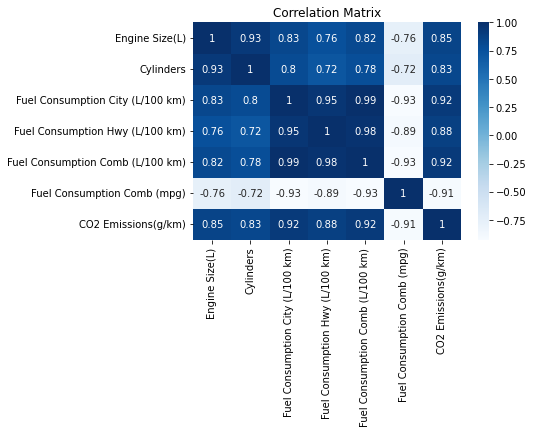

In [10]:
cm = df.corr()
sns.heatmap(cm, annot = True, cmap = 'Blues')
plt.title("Correlation Matrix")
plt.show()

Text(0.5, 1.0, 'Co2 Emission by engine Size(L)')

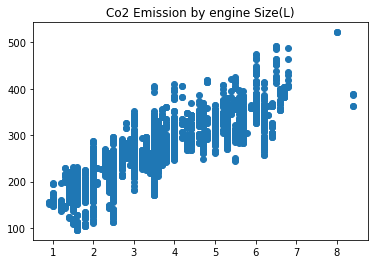

In [95]:
plt.scatter(x=df["Engine Size(L)"], y=df["CO2 Emissions(g/km)"])
plt.title("Co2 Emission by Engine Size(L)")

C:\Users\jespe\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 49.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\jespe\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 94.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\jespe\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 7.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\jespe\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 93.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\jespe\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 88.9% of the points 

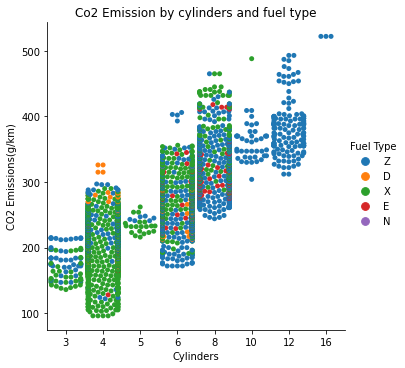

In [93]:
g = sns.catplot(data=df, x="Cylinders", y="CO2 Emissions(g/km)", hue="Fuel Type", kind="swarm")
g.set(title="Co2 Emission by cylinders and fuel type")

C:\Users\jespe\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 66.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\jespe\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 77.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\jespe\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 84.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\jespe\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 63.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\jespe\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 94.8% of the points

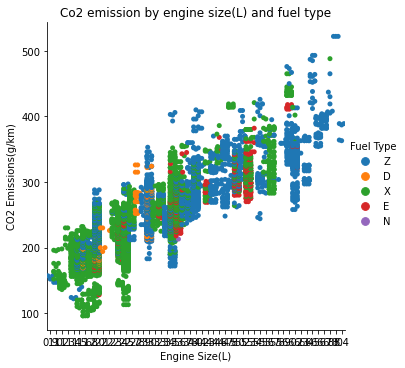

In [96]:
g = sns.catplot(data=df, x="Engine Size(L)", y="CO2 Emissions(g/km)", hue="Fuel Type", kind="swarm")
g.set(title="Co2 emission by engine size(L) and fuel type")

### Fuel Type
X = Regular gasoline <br>
Z = Premium gasoline <br>
D = Diesel <br>
E = Ethanol (E85) <br>
N = Natural gas <br>

# OneHot encoder

In [11]:
#Identify the categorical features
cat_features = ['Fuel Type']
onehot_encoder = OneHotEncoder()
onehot_encoder.fit(df[cat_features])
encoded_features = onehot_encoder.transform(df[cat_features]).toarray()
processed_data = np.concatenate((df, encoded_features), axis=1)

In [12]:
# Create a list of new column names for the encoded features
new_cols = onehot_encoder.get_feature_names(cat_features)

C:\Users\jespe\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [13]:
# Convert the encoded features array to a dataframe
encoded_features_df = pd.DataFrame(encoded_features, columns=new_cols)

In [14]:
numeric_df = pd.concat([encoded_features_df, X], axis=1, join='inner')
numeric_df

,Fuel Type_D,Fuel Type_E,Fuel Type_N,Fuel Type_X,Fuel Type_Z,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km)
0,0.0,0.0,0.0,0.0,1.0,2.5,4,9.9,6.7,8.5
1,0.0,0.0,0.0,0.0,1.0,2.4,4,11.2,7.7,9.6
2,0.0,0.0,0.0,0.0,1.0,1.5,4,6.0,5.8,5.9
3,0.0,0.0,0.0,0.0,1.0,3.5,6,12.7,9.1,11.1
4,0.0,0.0,0.0,0.0,1.0,3.5,6,12.1,8.7,10.6
...,...,...,...,...,...,...,...,...,...,...
7380,0.0,0.0,0.0,0.0,1.0,2.0,4,10.7,7.7,9.4
7381,0.0,0.0,0.0,0.0,1.0,2.0,4,11.2,8.3,9.9
7382,0.0,0.0,0.0,0.0,1.0,2.0,4,11.7,8.6,10.3
7383,0.0,0.0,0.0,0.0,1.0,2.0,4,11.2,8.3,9.9


In [30]:
X_train, X_test, y_train, y_test = train_test_split(numeric_df, y, test_size=0.2, random_state=42)

In [31]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float32))
X_test_scaled = scaler.transform(X_test.astype(np.float32))

# Training different models 
## Linear Regression



In [32]:
Limodel = LinearRegression()
Limodel.fit(X_train_scaled, y_train)

LinearRegression()

In [33]:
y_train_pred = Limodel.predict(X_train_scaled)
rmse_LR = mean_squared_error(y_train, y_train_pred, squared=False)
score_r2_LR = r2_score(y_train, y_train_pred)
print('rmse:',rmse_LR)
print('r^2 score: ',score_r2_LR)

rmse: 5.3569729132273505
r^2 score:  0.9916054613130133


In [34]:
y_pred_cv = cross_val_predict(Limodel, X_train_scaled, y_train, cv=5, verbose=3)
y_pred_cv

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


array([231.87541, 294.82172, 271.52777, ..., 242.72295, 200.75493,
       277.47644], dtype=float32)

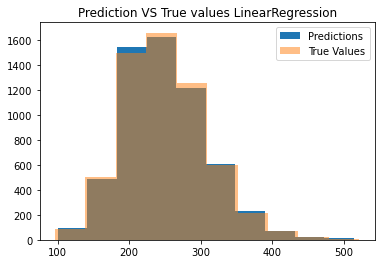

In [35]:
plt.hist(y_pred_cv, label='Predictions')
plt.hist(y_train, alpha=0.5, label='True Values')
plt.title("Prediction VS True values LinearRegression")
plt.legend(loc='upper right')
plt.show()

## Support Vector Regression

In [42]:
svr_model = SVR(kernel='rbf', C=1e3, gamma='auto')
svr_model.fit(X_train_scaled, y_train)

SVR(C=1000.0, gamma='auto')

In [43]:
y_train_pred = svr_model.predict(X_train_scaled)    
rmse_LR = mean_squared_error(y_train, y_train_pred, squared=False)
score_r2_LR = r2_score(y_train , y_train_pred)
print('rmse:',rmse_LR)
print('r^2 score: ',score_r2_LR)

rmse: 2.7985000814630574
r^2 score:  0.997709087078261


In [44]:
y_pred_cv = cross_val_predict(svr_model, X_train_scaled, y_train, cv=5, verbose=3)
y_pred_cv

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   17.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   44.8s finished


array([231.32478867, 297.47921981, 272.60613128, ..., 243.80402206,
       200.01396746, 279.0683685 ])

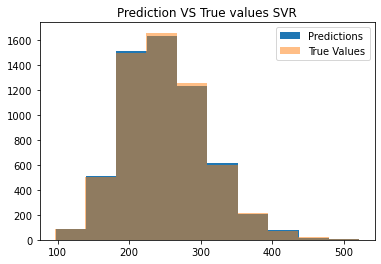

In [45]:
plt.hist(y_pred_cv, label='Predictions')
plt.hist(y_train, alpha=0.5, label='True Values')
plt.title("Prediction VS True values SVR")
plt.legend(loc='upper right')
plt.show()

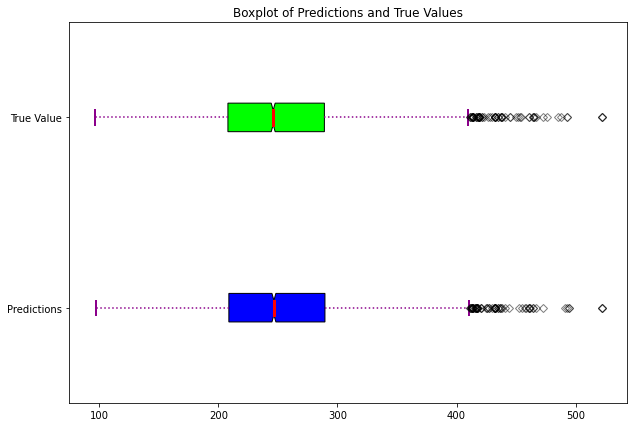

In [46]:
data_1 = y_pred_cv
data_2 = y_train
data = [data_1, data_2]

fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)
 
# Creating axes instance
bp = ax.boxplot(data, patch_artist = True,
                notch ='True', vert = 0)
colors = ['#0000FF', '#00FF00']

for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    
for whisker in bp['whiskers']:
    whisker.set(color ='#8B008B',
                linewidth = 1.5,
                linestyle =":")
for cap in bp['caps']:
    cap.set(color ='#8B008B',
            linewidth = 2)

for median in bp['medians']:
    median.set(color ='red',
               linewidth = 3)
    
for flier in bp['fliers']:
    flier.set(marker ='D',
              color ='#e7298a',
              alpha = 0.5)     
# x-axis labels
ax.set_yticklabels(['Predictions', 'True Value'])
 
# Adding title
plt.title("Boxplot of Predictions and True Values")
 
# Removing top axes and right axes
# ticks
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()

# show plot
plt.show()

## Random Forest


In [47]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train_scaled, y_train)

RandomForestRegressor()

In [48]:
y_train_pred = rf_model.predict(X_train_scaled)    
rmse_LR = mean_squared_error(y_train, y_train_pred, squared=False)
score_r2_LR = r2_score(y_train , y_train_pred)
print('rmse:',rmse_LR)
print('r^2 score: ',score_r2_LR)

rmse: 1.4071658019111504
r^2 score:  0.9994207734264224


In [49]:
y_pred_cv = cross_val_predict(rf_model, X_train_scaled, y_train, cv=5, verbose=3)
y_pred_cv

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    9.0s finished


array([231.83      , 296.72433333, 270.98528571, ..., 242.30428571,
       199.83766667, 278.85543146])

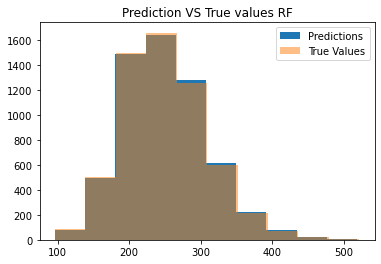

In [50]:
plt.hist(y_pred_cv, label='Predictions')
plt.hist(y_train, alpha=0.5, label='True Values')
plt.title("Prediction VS True values RF")
plt.legend(loc='upper right')
plt.show()

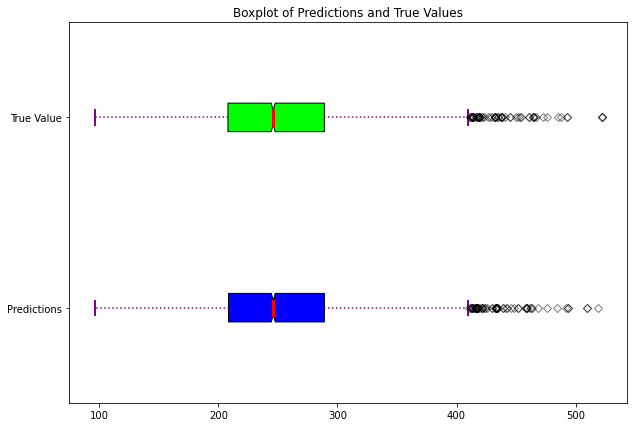

In [51]:
data_1 = y_pred_cv
data_2 = y_train
data = [data_1, data_2]

fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)
 
# Creating axes instance
bp = ax.boxplot(data, patch_artist = True,
                notch ='True', vert = 0)
colors = ['#0000FF', '#00FF00']

for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    
for whisker in bp['whiskers']:
    whisker.set(color ='#8B008B',
                linewidth = 1.5,
                linestyle =":")
for cap in bp['caps']:
    cap.set(color ='#8B008B',
            linewidth = 2)

for median in bp['medians']:
    median.set(color ='red',
               linewidth = 3)
    
for flier in bp['fliers']:
    flier.set(marker ='D',
              color ='#e7298a',
              alpha = 0.5)     
# x-axis labels
ax.set_yticklabels(['Predictions', 'True Value'])
 
# Adding title
plt.title("Boxplot of Predictions and True Values")
 
# Removing top axes and right axes
# ticks
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()

# show plot
plt.show()

## Lasso 

In [52]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)

Lasso(alpha=0.1)

In [53]:
y_train_pred = lasso.predict(X_train_scaled)    
rmse_LR = mean_squared_error(y_train, y_train_pred, squared=False)
score_r2_LR = r2_score(y_train , y_train_pred)
print('rmse:',rmse_LR)
print('r^2 score: ',score_r2_LR)

rmse: 5.371415166334352
r^2 score:  0.9915601374038024


In [54]:
y_pred_cv = cross_val_predict(lasso, X_train_scaled, y_train, cv=5, verbose=3)
y_pred_cv

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
C:\Users\jespe\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.747e+03, tolerance: 1.599e+03
  model = cd_fast.enet_coordinate_descent(
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.3s finished


array([232.1816 , 294.8095 , 271.13928, ..., 242.71289, 200.50105,
       277.6018 ], dtype=float32)

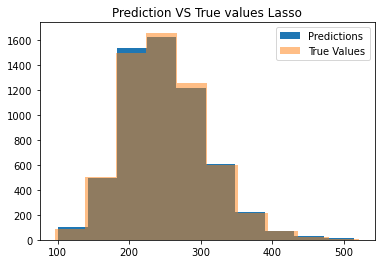

In [55]:
plt.hist(y_pred_cv, label='Predictions')
plt.hist(y_train, alpha=0.5, label='True Values')
plt.title("Prediction VS True values Lasso")
plt.legend(loc='upper right')
plt.show()

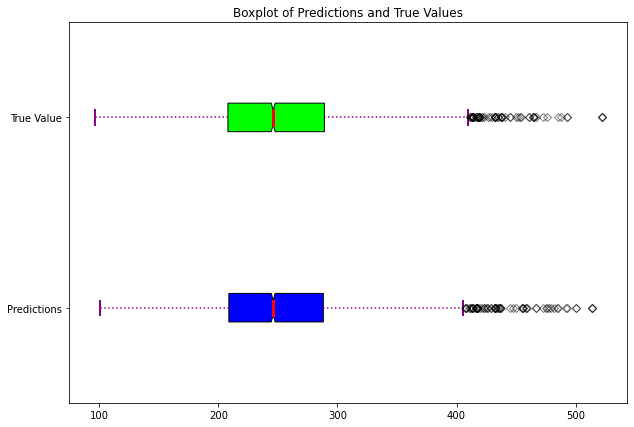

In [56]:
data_1 = y_pred_cv
data_2 = y_train
data = [data_1, data_2]

fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)
 
# Creating axes instance
bp = ax.boxplot(data, patch_artist = True,
                notch ='True', vert = 0)
colors = ['#0000FF', '#00FF00']

for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    
for whisker in bp['whiskers']:
    whisker.set(color ='#8B008B',
                linewidth = 1.5,
                linestyle =":")
for cap in bp['caps']:
    cap.set(color ='#8B008B',
            linewidth = 2)

for median in bp['medians']:
    median.set(color ='red',
               linewidth = 3)
    
for flier in bp['fliers']:
    flier.set(marker ='D',
              color ='#e7298a',
              alpha = 0.5)     
# x-axis labels
ax.set_yticklabels(['Predictions', 'True Value'])
 
# Adding title
plt.title("Boxplot of Predictions and True Values")
 
# Removing top axes and right axes
# ticks
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()

# show plot
plt.show()

## Ridge Regression

In [57]:
ridge = Ridge(alpha=0.1)
ridge.fit(X_train_scaled, y_train)

Ridge(alpha=0.1)

In [58]:
y_train_pred = ridge.predict(X_train_scaled)    
rmse_LR = mean_squared_error(y_train, y_train_pred, squared=False)
score_r2_LR = r2_score(y_train , y_train_pred)
print('rmse:',rmse_LR)
print('r^2 score: ',score_r2_LR)

rmse: 5.356835051249561
r^2 score:  0.9916058933752371


In [59]:
y_pred_cv = cross_val_predict(ridge, X_train_scaled, y_train, cv=5, verbose=3)
y_pred_cv

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


array([231.98471, 294.8482 , 271.61533, ..., 242.72726, 200.75903,
       277.4944 ], dtype=float32)

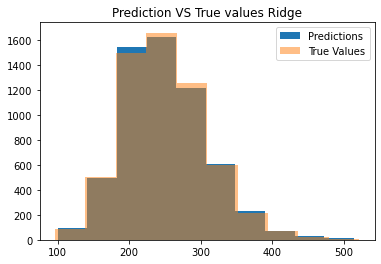

In [60]:
plt.hist(y_pred_cv, label='Predictions')
plt.hist(y_train, alpha=0.5, label='True Values')
plt.title("Prediction VS True values Ridge")
plt.legend(loc='upper right')
plt.show()

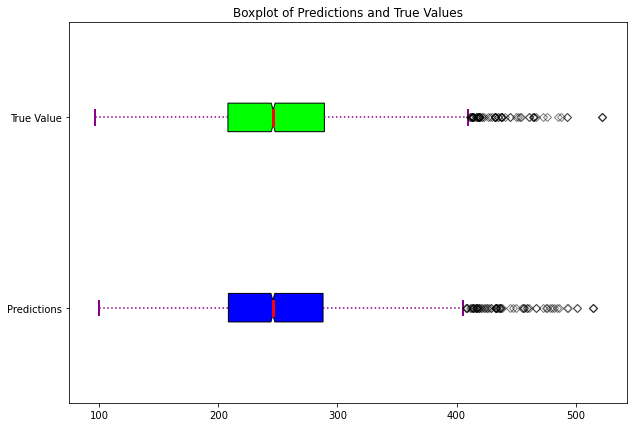

In [61]:
data_1 = y_pred_cv
data_2 = y_train
data = [data_1, data_2]

fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)
 
# Creating axes instance
bp = ax.boxplot(data, patch_artist = True,
                notch ='True', vert = 0)
colors = ['#0000FF', '#00FF00']

for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    
for whisker in bp['whiskers']:
    whisker.set(color ='#8B008B',
                linewidth = 1.5,
                linestyle =":")
for cap in bp['caps']:
    cap.set(color ='#8B008B',
            linewidth = 2)

for median in bp['medians']:
    median.set(color ='red',
               linewidth = 3)
    
for flier in bp['fliers']:
    flier.set(marker ='D',
              color ='#e7298a',
              alpha = 0.5)     
# x-axis labels
ax.set_yticklabels(['Predictions', 'True Value'])
 
# Adding title
plt.title("Boxplot of Predictions and True Values")
 
# Removing top axes and right axes
# ticks
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()

# show plot
plt.show()

# Gridsearch for random forest

In [64]:
rf_model_b = RandomForestRegressor(bootstrap=False, max_features=3, n_estimators=10,
    random_state=42)
rf_model_b.fit(X_train_scaled, y_train)

RandomForestRegressor(bootstrap=False, max_features=3, n_estimators=10,
                      random_state=42)

# RandomSearchCV for SVR

# Result of random forest with best hyperparameters
## Test set

In [65]:
y_pred = rf_model_b.predict(X_test_scaled)    
rmse_LR = mean_squared_error(y_test, y_pred, squared=False)
score_r2_LR = r2_score(y_test , y_pred)
print('rmse:',rmse_LR)
print('r^2 score: ',score_r2_LR)

rmse: 3.1943621194739924
r^2 score:  0.9970334143438864


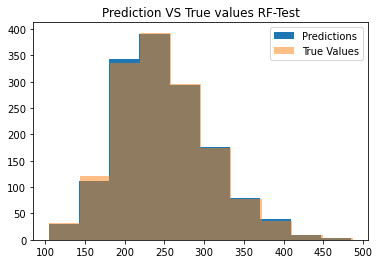

In [66]:
plt.hist(y_pred, label='Predictions')
plt.hist(y_test, alpha=0.5, label='True Values')
plt.title("Prediction VS True values RF-Test")
plt.legend(loc='upper right')
plt.show()

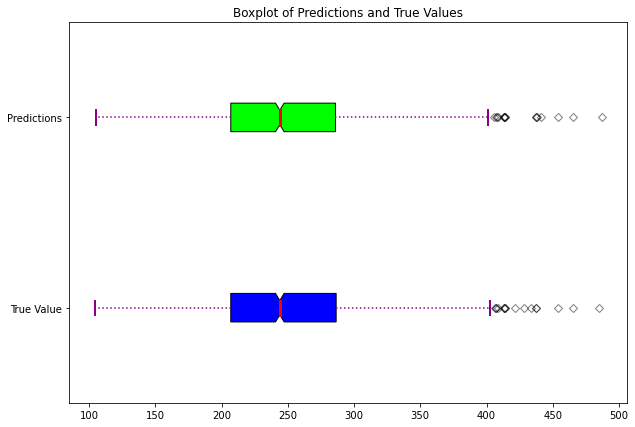

In [67]:
data_1 = y_pred
data_2 = y_test
data = [data_1, data_2]

fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)
 
# Creating axes instance
bp = ax.boxplot(data, patch_artist = True,
                notch ='True', vert = 0)
colors = ['#0000FF', '#00FF00']

for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    
for whisker in bp['whiskers']:
    whisker.set(color ='#8B008B',
                linewidth = 1.5,
                linestyle =":")
for cap in bp['caps']:
    cap.set(color ='#8B008B',
            linewidth = 2)

for median in bp['medians']:
    median.set(color ='red',
               linewidth = 3)
    
for flier in bp['fliers']:
    flier.set(marker ='D',
              color ='#e7298a',
              alpha = 0.5)     
# x-axis labels
ax.set_yticklabels(['True Value', 'Predictions'])
 
# Adding title
plt.title("Boxplot of Predictions and True Values")
 
# Removing top axes and right axes
# ticks
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()

# show plot
plt.show()

# Result for SVR 
## Test set

In [68]:
y_pred = svr_model.predict(X_test_scaled)    
rmse_LR = mean_squared_error(y_pred, y_test, squared=False)
score_r2_LR = r2_score(y_test , y_pred)
print('rmse:',rmse_LR)
print('r^2 score: ',score_r2_LR)

rmse: 3.574434739958213
r^2 score:  0.9962854745091765


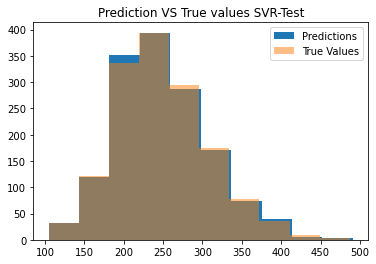

In [69]:
plt.hist(y_pred, label='Predictions')
plt.hist(y_test, alpha=0.5, label='True Values')
plt.title("Prediction VS True values SVR-Test")
plt.legend(loc='upper right')
plt.show()

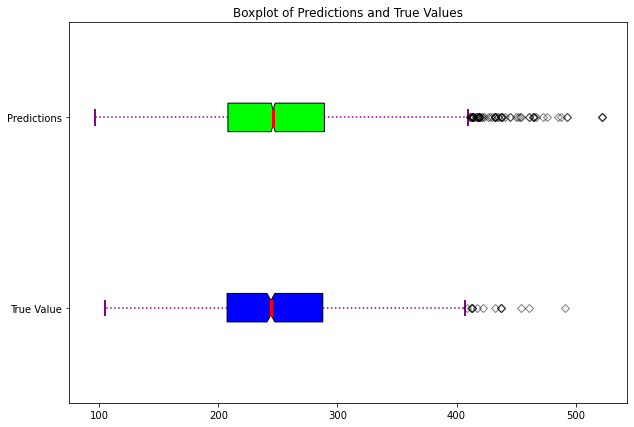

In [70]:
data_1 = y_pred
data_2 = y_train
data = [data_1, data_2]

fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)
 
# Creating axes instance
bp = ax.boxplot(data, patch_artist = True,
                notch ='True', vert = 0)
colors = ['#0000FF', '#00FF00']

for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    
for whisker in bp['whiskers']:
    whisker.set(color ='#8B008B',
                linewidth = 1.5,
                linestyle =":")
for cap in bp['caps']:
    cap.set(color ='#8B008B',
            linewidth = 2)

for median in bp['medians']:
    median.set(color ='red',
               linewidth = 3)
    
for flier in bp['fliers']:
    flier.set(marker ='D',
              color ='#e7298a',
              alpha = 0.5)     
# x-axis labels
ax.set_yticklabels(['True Value', 'Predictions'])
 
# Adding title
plt.title("Boxplot of Predictions and True Values")
 
# Removing top axes and right axes
# ticks
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()

# show plot
plt.show()